In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('./상가업소정보.csv', sep='|')

In [3]:
columns = ['상호명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', 
           '시도명', '시군구명', '행정동명', '법정동명', '도로명주소', 
           '경도', '위도']

In [4]:
df=df[columns]

In [5]:
df_seoul=df[df['시도명']=='서울특별시'].copy()

In [6]:
df_seoul

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
2,프로포즈,음식,유흥주점,호프/맥주,서울특별시,금천구,독산3동,독산동,서울특별시 금천구 가산로 34-6,126.899220,37.471711
4,가락사우나내스낵,생활서비스,대중목욕탕/휴게,사우나/증기탕/온천,서울특별시,송파구,석촌동,석촌동,서울특별시 송파구 가락로 71,127.104071,37.500249
5,초밥왕,음식,일식/수산물,음식점-초밥전문,서울특별시,송파구,잠실6동,신천동,서울특별시 송파구 올림픽로 293-19,127.102490,37.515149
...,...,...,...,...,...,...,...,...,...,...,...
573675,비파티세리공덕,음식,한식,한식/백반/한정식,서울특별시,마포구,공덕동,공덕동,서울특별시 마포구 마포대로14길 4,126.955059,37.548618
573676,앤탑PC방,관광/여가/오락,PC/오락/당구/볼링등,인터넷PC방,서울특별시,성동구,성수2가3동,성수동2가,서울특별시 성동구 성수일로8길 37,127.054615,37.545853
573677,오즈아레나PC방,관광/여가/오락,PC/오락/당구/볼링등,인터넷PC방,서울특별시,강남구,논현1동,논현동,서울특별시 강남구 강남대로 492,127.024102,37.506202
573678,파인트리네일,생활서비스,이/미용/건강,발/네일케어,서울특별시,영등포구,여의동,여의도동,서울특별시 영등포구 국제금융로 10,126.924863,37.525172


In [7]:
df_seoul['상호명_소문자']=df_seoul['상호명'].str.lower()

In [8]:
df_seoul[['상호명', '상호명_소문자']]

,상호명,상호명_소문자
0,와라와라호프,와라와라호프
1,커피빈코리아선릉로93길점,커피빈코리아선릉로93길점
2,프로포즈,프로포즈
4,가락사우나내스낵,가락사우나내스낵
5,초밥왕,초밥왕
...,...,...
573675,비파티세리공덕,비파티세리공덕
573676,앤탑PC방,앤탑pc방
573677,오즈아레나PC방,오즈아레나pc방
573678,파인트리네일,파인트리네일


In [9]:
df_cafe=df_seoul[df_seoul['상호명_소문자'].str.contains('스타벅스|starbucks|이디야|이디아|ediya')].copy()

In [10]:
df_cafe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1049 entries, 1104 to 571052
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   상호명       1049 non-null   object 
 1   상권업종대분류명  1049 non-null   object 
 2   상권업종중분류명  1049 non-null   object 
 3   상권업종소분류명  1049 non-null   object 
 4   시도명       1049 non-null   object 
 5   시군구명      1049 non-null   object 
 6   행정동명      1049 non-null   object 
 7   법정동명      1049 non-null   object 
 8   도로명주소     1049 non-null   object 
 9   경도        1049 non-null   float64
 10  위도        1049 non-null   float64
 11  상호명_소문자   1049 non-null   object 
dtypes: float64(2), object(10)
memory usage: 106.5+ KB


In [11]:
df_cafe['상권업종소분류명'].value_counts()

커피전문점/카페/다방    1036
학원-외국어/어학         3
인쇄종합              2
종합소매              1
빠/카페/스탠드빠         1
통신판매              1
주택공급              1
패스트푸드             1
운동/경기용품           1
주유소               1
배관난방보일러           1
Name: 상권업종소분류명, dtype: int64

In [12]:
df_cafe=df_cafe[df_cafe['상권업종소분류명']=='커피전문점/카페/다방']

In [13]:
df_cafe.loc[df_cafe['상호명_소문자'].str.contains('스타벅스|starbucks'),'브랜드명']='스타벅스'

In [14]:
df_cafe['브랜드명']=df_cafe['브랜드명'].fillna('이디야')

In [15]:
df_cafe

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자,브랜드명
1104,스타벅스,음식,커피점/카페,커피전문점/카페/다방,서울특별시,용산구,이태원1동,이태원동,서울특별시 용산구 이태원로 188,126.994781,37.534303,스타벅스,스타벅스
1675,이디야커피,음식,커피점/카페,커피전문점/카페/다방,서울특별시,영등포구,신길1동,신길동,서울특별시 영등포구 영등포로 353,126.918062,37.515118,이디야커피,이디야
2023,스타벅스종로3가점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,종로구,종로1.2.3.4가동,종로3가,서울특별시 종로구 종로 113-1,126.990207,37.570585,스타벅스종로3가점,스타벅스
2770,스타벅스,음식,커피점/카페,커피전문점/카페/다방,서울특별시,서초구,잠원동,잠원동,서울특별시 서초구 강남대로 581,127.019763,37.513663,스타벅스,스타벅스
2957,이디야커피,음식,커피점/카페,커피전문점/카페/다방,서울특별시,구로구,구로3동,구로동,서울특별시 구로구 디지털로32길 43,126.897870,37.484385,이디야커피,이디야
...,...,...,...,...,...,...,...,...,...,...,...,...,...
567090,스타벅스,음식,커피점/카페,커피전문점/카페/다방,서울특별시,관악구,낙성대동,봉천동,서울특별시 관악구 관악로 158,126.952792,37.479298,스타벅스,스타벅스
567828,스타벅스,음식,커피점/카페,커피전문점/카페/다방,서울특별시,성동구,금호4가동,금호동4가,서울특별시 성동구 동호로 99,127.015329,37.548028,스타벅스,스타벅스
568636,이디야커피,음식,커피점/카페,커피전문점/카페/다방,서울특별시,서초구,양재1동,우면동,서울특별시 서초구 바우뫼로 20,127.025274,37.469980,이디야커피,이디야
570096,스타벅스,음식,커피점/카페,커피전문점/카페/다방,서울특별시,서대문구,북아현동,북아현동,서울특별시 서대문구 북아현로 29,126.956144,37.560080,스타벅스,스타벅스


In [16]:
import seaborn as sns

<AxesSubplot:xlabel='브랜드명', ylabel='count'>

C:\Users\14112\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\14112\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\14112\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48261 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\14112\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\14112\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\14112\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50556 missing from c

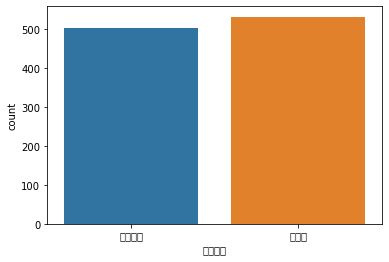

In [17]:
sns.countplot(data=df_cafe, x='브랜드명')

<AxesSubplot:xlabel='경도', ylabel='위도'>

C:\Users\14112\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\14112\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\14112\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\14112\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48652 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\14112\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47004 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\14112\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46300 missing from c

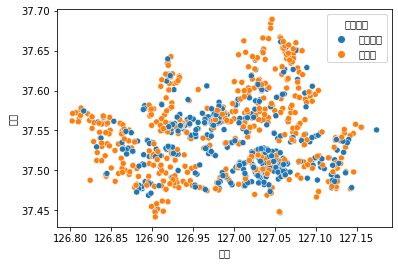

In [18]:
sns.scatterplot(data=df_cafe, x='경도', y='위도', hue='브랜드명')

C:\Users\14112\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\14112\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\14112\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)


C:\Users\14112\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\14112\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\14112\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\14112\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48652 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\14112\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47004 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\14112\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46300 missing from c

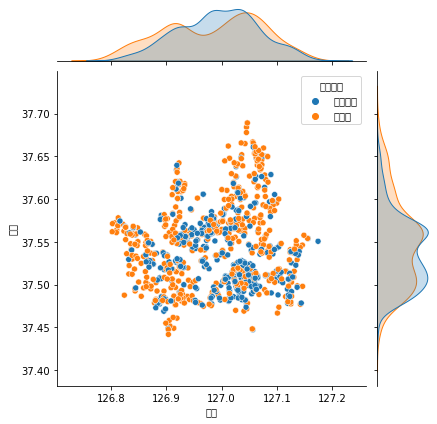

In [19]:
sns.jointplot(data=df_cafe, x='경도', y='위도', hue='브랜드명')

In [20]:
df_cafe.columns

Index(['상호명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', '시도명', '시군구명', '행정동명',
       '법정동명', '도로명주소', '경도', '위도', '상호명_소문자', '브랜드명'],
      dtype='object')

In [21]:
df_cafe_vs=df_cafe.groupby(['시군구명', '브랜드명'])['도로명주소'].count()
df_cafe_vs

시군구명  브랜드명
강남구   스타벅스    84
      이디야     50
강동구   스타벅스    13
      이디야     14
강북구   스타벅스     5
      이디야     12
강서구   스타벅스    17
      이디야     46
관악구   스타벅스    11
      이디야     24
광진구   스타벅스    14
      이디야     18
구로구   스타벅스    11
      이디야     22
금천구   스타벅스    13
      이디야     11
노원구   스타벅스     9
      이디야     34
도봉구   스타벅스     1
      이디야      9
동대문구  스타벅스     8
      이디야     19
동작구   스타벅스     8
      이디야     11
마포구   스타벅스    30
      이디야     26
서대문구  스타벅스    20
      이디야     15
서초구   스타벅스    48
      이디야     21
성동구   스타벅스     7
      이디야     18
성북구   스타벅스    13
      이디야     23
송파구   스타벅스    28
      이디야     28
양천구   스타벅스    10
      이디야     17
영등포구  스타벅스    30
      이디야     27
용산구   스타벅스    20
      이디야     11
은평구   스타벅스    10
      이디야     21
종로구   스타벅스    33
      이디야     19
중구    스타벅스    55
      이디야     25
중랑구   스타벅스     6
      이디야     11
Name: 도로명주소, dtype: int64

<AxesSubplot:xlabel='시군구명,브랜드명'>

C:\Users\14112\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\14112\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\14112\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\14112\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\14112\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\14112\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48261 missing from c

C:\Users\14112\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\14112\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\14112\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\14112\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\14112\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\14112\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 48261 missing from current fon

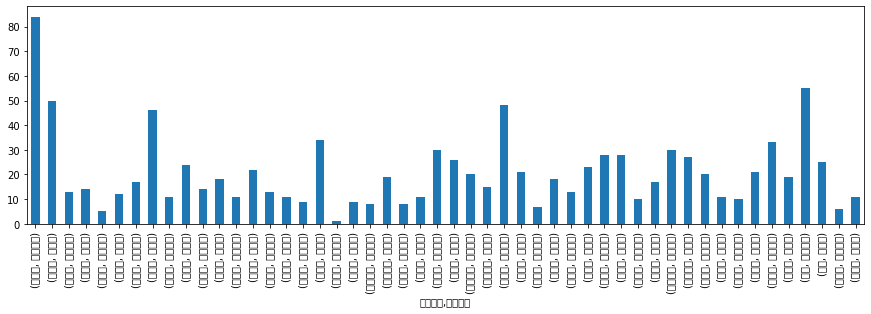

In [22]:
plt.figure(figsize=(15, 4))
df_cafe_vs.plot.bar()
#인덱스 자체가 구-브랜드 묶음으로 매우 많이 분류되어있는 형태이므로 판다스로 시각화가 가능은하다.

In [23]:
group=df_cafe_vs.reset_index()
group.columns=['구', '브랜드명', '매장수']

In [24]:
group

,구,브랜드명,매장수
0,강남구,스타벅스,84
1,강남구,이디야,50
2,강동구,스타벅스,13
3,강동구,이디야,14
4,강북구,스타벅스,5
5,강북구,이디야,12
6,강서구,스타벅스,17
7,강서구,이디야,46
8,관악구,스타벅스,11
9,관악구,이디야,24


In [25]:
pivot=pd.pivot_table(data= df_cafe, index=['시군구명', '브랜드명'], values='시도명' , aggfunc='count')
pivot

시도명
시군구명 브랜드명     
강남구  스타벅스   84
     이디야    50
강동구  스타벅스   13
     이디야    14
강북구  스타벅스    5
     이디야    12
강서구  스타벅스   17
     이디야    46
관악구  스타벅스   11
     이디야    24
광진구  스타벅스   14
     이디야    18
구로구  스타벅스   11
     이디야    22
금천구  스타벅스   13
     이디야    11
노원구  스타벅스    9
     이디야    34
도봉구  스타벅스    1
     이디야     9
동대문구 스타벅스    8
     이디야    19
동작구  스타벅스    8
     이디야    11
마포구  스타벅스   30
     이디야    26
서대문구 스타벅스   20
     이디야    15
서초구  스타벅스   48
     이디야    21
성동구  스타벅스    7
     이디야    18
성북구  스타벅스   13
     이디야    23
송파구  스타벅스   28
     이디야    28
양천구  스타벅스   10
     이디야    17
영등포구 스타벅스   30
     이디야    27
용산구  스타벅스   20
     이디야    11
은평구  스타벅스   10
     이디야    21
종로구  스타벅스   33
     이디야    19
중구   스타벅스   55
     이디야    25
중랑구  스타벅스    6
     이디야    11

In [26]:
pivot=pivot.reset_index()
pivot

,시군구명,브랜드명,시도명
0,강남구,스타벅스,84
1,강남구,이디야,50
2,강동구,스타벅스,13
3,강동구,이디야,14
4,강북구,스타벅스,5
5,강북구,이디야,12
6,강서구,스타벅스,17
7,강서구,이디야,46
8,관악구,스타벅스,11
9,관악구,이디야,24


<AxesSubplot:xlabel='시군구명', ylabel='시도명'>

C:\Users\14112\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\14112\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\14112\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\14112\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\14112\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48513 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\14112\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49436 missing from c

C:\Users\14112\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\14112\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\14112\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\14112\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\14112\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 48513 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\14112\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49436 missing from current fon

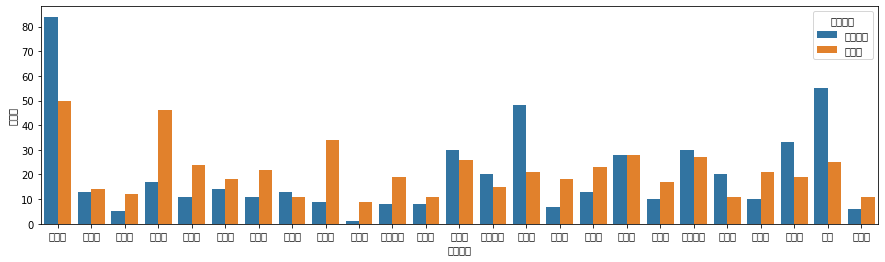

In [27]:
plt.figure(figsize=(15, 4))
sns.barplot(data=pivot, x='시군구명', y='시도명', hue='브랜드명')

<AxesSubplot:xlabel='시군구명', ylabel='count'>

C:\Users\14112\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\14112\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\14112\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\14112\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50689 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\14112\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46321 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\14112\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54252 missing from c

C:\Users\14112\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\14112\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\14112\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\14112\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50689 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\14112\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 46321 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\14112\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 54252 missing from current fon

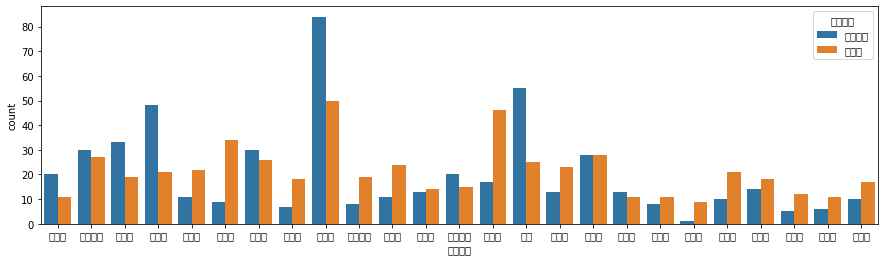

In [28]:
##groupby, pivot table 없이 바로 seaborn 활용하면 시각화가 용이하다!
plt.figure(figsize=(15, 4))

sns.countplot(data=df_cafe, x='시군구명', hue='브랜드명')

In [29]:
import folium
import folium.plugins

In [30]:
lat=df_cafe['위도'].mean()

In [31]:
long=df_cafe['경도'].mean()

In [32]:
m=folium.Map([lat, long], zoomstart=15)

k=folium.plugins.MarkerCluster().add_to(m)
for i in df_cafe.index:
    sub_lat=df_cafe.loc[i, '위도']
    sub_long=df_cafe.loc[i, '경도']
    color='blue'
    if df_cafe.loc[i,'브랜드명']=='스타벅스':
        color='green'
    letters=f"{df_cafe.loc[i, '도로명주소']}, {df_cafe.loc[i, '상호명']}"
    folium.CircleMarker([sub_lat, sub_long], radius=3, tooltip=letters, color=color).add_to(k)
m

In [38]:
geo_path='./seoul_municipalities_geo_simple.json'
import json

In [39]:
geo_json=json.load(open(geo_path, encoding="utf-8"))
geo_json

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'code': '11250',
    'name': '강동구',
    'name_eng': 'Gangdong-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.11519584981606, 37.557533180704915],
      [127.11879551821994, 37.557222485451305],
      [127.12146867175024, 37.55986003393365],
      [127.12435254630417, 37.56144246249796],
      [127.13593925898998, 37.56564793048277],
      [127.14930548011061, 37.56892250303897],
      [127.15511020940411, 37.57093642128295],
      [127.16683184366129, 37.57672487388627],
      [127.17038810813094, 37.576465605301046],
      [127.17607118428914, 37.57678573961056],
      [127.17905504160184, 37.57791388161732],
      [127.17747787800164, 37.57448983055031],
      [127.1781775408844, 37.571481967974336],
      [127.17995281860672, 37.569309661290504],
      [127.18122821955262, 37.56636089217979],
      [127.18169407550688, 37.56286338914073],
      [127.18408792

In [40]:
geo_json['features'][0]["properties"]['name']

'강동구'

In [41]:
df_cafe_vs=df_cafe_vs.reset_index()

In [42]:
df_cafe_vs.columns=['구', '브랜드명', '매장수']

In [43]:
df_cafe_vs

,구,브랜드명,매장수
0,강남구,스타벅스,84
1,강남구,이디야,50
2,강동구,스타벅스,13
3,강동구,이디야,14
4,강북구,스타벅스,5
5,강북구,이디야,12
6,강서구,스타벅스,17
7,강서구,이디야,46
8,관악구,스타벅스,11
9,관악구,이디야,24


In [45]:
df_star=df_cafe_vs[df_cafe_vs['브랜드명']=='스타벅스'].copy()
df_star

,구,브랜드명,매장수
0,강남구,스타벅스,84
2,강동구,스타벅스,13
4,강북구,스타벅스,5
6,강서구,스타벅스,17
8,관악구,스타벅스,11
10,광진구,스타벅스,14
12,구로구,스타벅스,11
14,금천구,스타벅스,13
16,노원구,스타벅스,9
18,도봉구,스타벅스,1


In [46]:
geo_json['features'][0]['properties']['name']

'강동구'

In [49]:
m=folium.Map([lat, long])
folium.Choropleth(
    geo_data=geo_json,
    data=df_star,
    columns=['구', '매장수'],
    key_on='feature.properties.name',
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='스타벅스 매장수').add_to(m)
m

In [50]:
df_ediya=df_cafe_vs[df_cafe_vs['브랜드명']=='이디야'].copy()
df_ediya

,구,브랜드명,매장수
1,강남구,이디야,50
3,강동구,이디야,14
5,강북구,이디야,12
7,강서구,이디야,46
9,관악구,이디야,24
11,광진구,이디야,18
13,구로구,이디야,22
15,금천구,이디야,11
17,노원구,이디야,34
19,도봉구,이디야,9


In [51]:
m=folium.Map([lat, long])
folium.Choropleth(
    geo_data=geo_json,
    data=df_ediya,
    columns=['구', '매장수'],
    key_on='feature.properties.name',
    fill_color="Blues",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='이디야 매장수').add_to(m)
k=folium.plugins.MarkerCluster().add_to(m)
for i in df_cafe.index:
    sub_lat=df_cafe.loc[i, '위도']
    sub_long=df_cafe.loc[i, '경도']
    color='blue'
    if df_cafe.loc[i,'브랜드명']=='스타벅스':
        color='green'
    letters=f"{df_cafe.loc[i, '도로명주소']}, {df_cafe.loc[i, '상호명']}"
    folium.CircleMarker([sub_lat, sub_long], radius=3, tooltip=letters, color=color).add_to(k)
m

In [78]:
#pivot 은 agg func가 없지만 reshaping 용이
df_vs=df_cafe_vs.pivot(index='구', columns='브랜드명', values='매장수')

In [79]:
df_vs.columns

Index(['스타벅스', '이디야'], dtype='object', name='브랜드명')

In [80]:
#같은 형식, shape일때 연산가능
df_vs['매장수비교']=df_vs['스타벅스'] -df_vs['이디야']>0

In [81]:
df_vs['매장수비교']=df_vs['매장수비교'].astype(float)
#radius 의 타입이 float이라서,
df_vs

브랜드명,스타벅스,이디야,매장수비교
구,,,
강남구,84,50,1.0
강동구,13,14,0.0
강북구,5,12,0.0
강서구,17,46,0.0
관악구,11,24,0.0
광진구,14,18,0.0
구로구,11,22,0.0
금천구,13,11,1.0
노원구,9,34,0.0


In [82]:
df_vs=df_vs.reset_index()
df_vs

브랜드명,구,스타벅스,이디야,매장수비교
0,강남구,84,50,1.0
1,강동구,13,14,0.0
2,강북구,5,12,0.0
3,강서구,17,46,0.0
4,관악구,11,24,0.0
5,광진구,14,18,0.0
6,구로구,11,22,0.0
7,금천구,13,11,1.0
8,노원구,9,34,0.0
9,도봉구,1,9,0.0


In [83]:
df_vs.head()

브랜드명,구,스타벅스,이디야,매장수비교
0,강남구,84,50,1.0
1,강동구,13,14,0.0
2,강북구,5,12,0.0
3,강서구,17,46,0.0
4,관악구,11,24,0.0


In [103]:
m=folium.Map([lat, long])
folium.Choropleth(
    geo_data=geo_json,
    data=df_vs,
    columns=['구', '매장수비교'],
    key_on='feature.properties.name',
    fill_color="BuGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='매장수비교').add_to(m)

m

In [96]:
df_gu_mean=df_cafe.pivot_table(index='시군구명', values=['경도', '위도'], aggfunc='mean')
df_gu_mean=df_gu_mean.reset_index()

In [99]:
df_vs=df_vs.merge(df_gu_mean, how='inner', left_on='구', right_on='시군구명')

In [100]:
df_vs.head()

,구,스타벅스,이디야,매장수비교,시군구명,경도,위도
0,강남구,84,50,1.0,강남구,127.046129,37.505744
1,강동구,13,14,0.0,강동구,127.135417,37.540316
2,강북구,5,12,0.0,강북구,127.022897,37.631146
3,강서구,17,46,0.0,강서구,126.837883,37.555966
4,관악구,11,24,0.0,관악구,126.935210,37.482054


In [102]:
for i in df_vs.index:
    sub_long=df_vs.loc[i, '경도']
    sub_lat=df_vs.loc[i, '위도']
    print(df_vs.loc[i, '구'], sub_long, sub_lat)

강남구 127.04612924851477 37.50574379723647
강동구 127.13541705768304 37.540316128928005
강북구 127.02289728220342 37.63114579912596
강서구 126.8378831992901 37.555966339807725
관악구 126.93521011850088 37.482054429288624
광진구 127.08329747837426 37.543769718110475
구로구 126.87745596750014 37.494060747742985
금천구 126.8921962213389 37.469286927652114
노원구 127.06717137772726 37.6423933051354
도봉구 127.04047354226732 37.66576544822702
동대문구 127.05492813212528 37.580700635471146
동작구 126.94890217041826 37.49570035386574
마포구 126.92300493503947 37.55548154197544
서대문구 126.93762476470604 37.566284229288875
서초구 127.01402160112261 37.49301091104672
성동구 127.03635911128879 37.55457943854072
성북구 127.02565170180024 37.59886024576222
송파구 127.1141353230951 37.501179914609615
양천구 126.86196683493064 37.52891847594384
영등포구 126.91390000535677 37.520781009585264
용산구 126.98251254628538 37.53468952777027
은평구 126.92041650466946 37.61406806596294
종로구 126.98723628325011 37.57615434804085
중구 126.98657335073601 37.56289726978084
중랑구 127.

In [124]:
m=folium.Map([lat, long], zoom_start=11)
folium.Choropleth(
    geo_data=geo_json,
    data=df_vs,
    columns=['구', '매장수비교'],
    key_on='feature.properties.name',
    fill_color="BuGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='매장수비교').add_to(m)

for i in df_vs.index:
    sub_long=df_vs.loc[i, '경도']
    sub_lat=df_vs.loc[i, '위도']
    
    cafes=['스타벅스', '이디야']
    for cafe in cafes:
        cafe_count=df_vs.loc[i, cafe]
        
        radius=np.sqrt(cafe_count) *3
        gu=df_vs.loc[i, '구']
        
        tooltip=f"{gu} {cafe} : {cafe_count}"
        color='green'
        
        if cafe=='이디야':
            color='blue'
            sub_long=sub_long+0.01
        
        folium.CircleMarker([sub_lat, sub_long],
                           radius=radius,
                            fill=True,
                           color=color,
                           tooltip=tooltip,).add_to(m)
m

In [121]:
df_vs

,구,스타벅스,이디야,매장수비교,시군구명,경도,위도
0,강남구,84,50,1.0,강남구,127.046129,37.505744
1,강동구,13,14,0.0,강동구,127.135417,37.540316
2,강북구,5,12,0.0,강북구,127.022897,37.631146
3,강서구,17,46,0.0,강서구,126.837883,37.555966
4,관악구,11,24,0.0,관악구,126.935210,37.482054
5,광진구,14,18,0.0,광진구,127.083297,37.543770
6,구로구,11,22,0.0,구로구,126.877456,37.494061
7,금천구,13,11,1.0,금천구,126.892196,37.469287
8,노원구,9,34,0.0,노원구,127.067171,37.642393
9,도봉구,1,9,0.0,도봉구,127.040474,37.665765
